In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy

#function to load data
def load_dataset():
    #load train data
    train_data = h5py.File('train_happy.h5', "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    #load test data
    test_data = h5py.File('test_happy.h5', "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    return x_train, y_train, x_test, y_test

In [2]:
X_train, Y_train, X_test, Y_test = load_dataset()
#Rescale data
X_train = X_train/255.
X_test = X_test/255.
Y_train = Y_train.T
Y_test = Y_test.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


y = 1


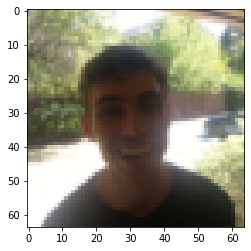

In [15]:
index = 201
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[index])))

In [10]:
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.layers.normalization import BatchNormalization

ImportError: cannot import name 'BatchNormalization' from 'keras.layers.normalization' (/opt/conda/envs/python3/lib/python3.8/site-packages/keras/layers/normalization/__init__.py)

In [11]:
np.random.seed(1001)
model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', input_shape = (64,64,3),activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu',name='lastconv'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu',kernel_initializer="uniform"))
#Output Layer
model.add(Dense(1, kernel_initializer="uniform", activation = 'sigmoid',name='prediction_layer'))
opt = keras.optimizers.Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#opt = RMSprop()
# Compiling Neural Network
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 lastconv (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [12]:
history=model.fit(X_train, Y_train, batch_size=20, epochs=10,validation_split=.1)

Epoch 1/10
27/27 [==============================] - 18s 555ms/step - loss: 0.6943 - accuracy: 0.5222 - val_loss: 0.6879 - val_accuracy: 0.6167
Epoch 2/10
27/27 [==============================] - 2s 94ms/step - loss: 0.6741 - accuracy: 0.5685 - val_loss: 0.6326 - val_accuracy: 0.5333
Epoch 3/10
27/27 [==============================] - 2s 72ms/step - loss: 0.5727 - accuracy: 0.7185 - val_loss: 0.4586 - val_accuracy: 0.8833
Epoch 4/10
27/27 [==============================] - 4s 164ms/step - loss: 0.4176 - accuracy: 0.8148 - val_loss: 0.2374 - val_accuracy: 0.9167
Epoch 5/10
27/27 [==============================] - 3s 79ms/step - loss: 0.2820 - accuracy: 0.8833 - val_loss: 0.5008 - val_accuracy: 0.7333
Epoch 6/10
27/27 [==============================] - 2s 70ms/step - loss: 0.2519 - accuracy: 0.8944 - val_loss: 0.1291 - val_accuracy: 0.9667
Epoch 7/10
27/27 [==============================] - 2s 76ms/step - loss: 0.1668 - accuracy: 0.9370 - val_loss: 0.1196 - val_accuracy: 0.9500
Epoch 8/10

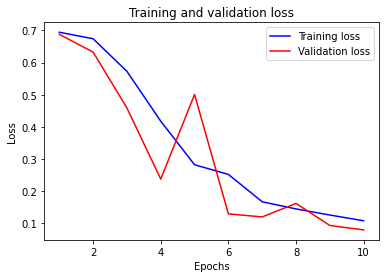

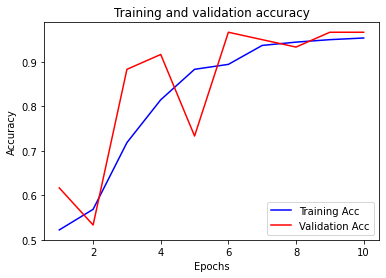

In [16]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[[65  1]
 [ 5 79]]


<AxesSubplot:>

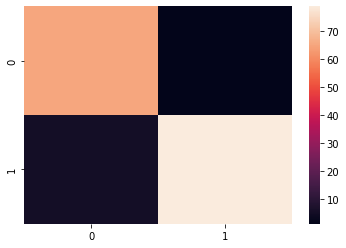

In [17]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
import matplotlib.pyplot as plt
import seaborn as sn
print(cm)
sn.heatmap(cm)

In [22]:
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_2 (3, 3, 3, 32)
conv2d_3 (3, 3, 32, 32)
lastconv (3, 3, 32, 32)


In [41]:
#### CODE BELOW IS TAKEN FROM https://github.com/keras-team/keras-io/blob/master/examples/vision/visualizing_what_convnets_learn.py
import tensorflow as tf
# The dimensions of our input image
img_width = 64
img_height = 64
layer_name = "lastconv"

# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.models.Model(inputs=model.inputs, outputs=layer.output)


def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img



def initialize_image():
    # We start from a gray image with some random noise
    img = tf.random.uniform((1, img_width, img_height, 3))
    # ResNet50V2 expects inputs in the range [-1, +1].
    # Here we scale our random inputs to [-0.125, +0.125]
    return (img - 0.5) * 0.25


def visualize_filter(filter_index):
    # We run gradient ascent for 20 steps
    iterations = 20
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img



from IPython.display import Image, display

loss, img = visualize_filter(0)
keras.preprocessing.image.save_img("0.png", img)


display(Image("0.png"))

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


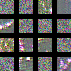

In [39]:
# Compute image inputs that maximize per-filter activations
# for the first few filters of our target layer
all_imgs = []
for filter_index in range(16):
    print("Processing filter %d" % (filter_index,))
    loss, img = visualize_filter(filter_index)
    all_imgs.append(img)

# Build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
n = 4
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# Fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img = all_imgs[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = img
keras.preprocessing.image.save_img("stiched_filters.png", stitched_filters)

from IPython.display import Image, display

display(Image("stiched_filters.png"))

In [28]:
#import eli5 # not installed

ModuleNotFoundError: No module named 'eli5'

In [27]:
#a=eli5.show_prediction(model, np.expand_dims(X_test[17], axis=0))
#plt.imshow(a)

NameError: name 'eli5' is not defined